그래디언트 부스팅은 여러 개의 결정 트리를 순차적으로 학습하여 예측을 개선하는 방법입니다.

약한 학습기(weak learners)**를 순차적으로 학습시켜 예측 성능을 점진적으로 향상시키는 방법입니다.

여기서 약한 학습기는 보통 **결정 트리(Decision Tree)**이며, 이전 모델의 오차를 점차 줄이는 방식으로 새 모델을 학습하게 됩니다.

그래디언트 부스팅은 이전 단계에서 발생한 오차를 계속해서 보정해 나가며, 최종적으로 강력한 예측 성능을 가진 모델을 만듭니다.

## 1. iris 데이터 셋 사례

코드 설명

In [ ]:
# 그래디언트 부스팅 모델 생성
# gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
# 그래디언트 부스팅(Gradient Boosting) 모델을 생성하는 코드입니다. 
# 1. GradientBoostingClassifier
# GradientBoostingClassifier: scikit-learn 라이브러리에서 제공하는 그래디언트 부스팅을 사용한 분류 모델입니다.

# 2. n_estimators=100
# n_estimators: 이 매개변수는 그래디언트 부스팅에서 사용되는 약한 학습기의 개수를 설정합니다.
# 여기서 n_estimators=100은 100개의 약한 학습기(결정 트리)를 순차적으로 학습시키겠다는 의미입니다.
# 약한 학습기 개수가 많을수록 모델의 복잡도가 증가하고 더 정밀한 결과를 얻을 수 있지만, 너무 많은 학습기를 사용하면 과적합의 위험이 있습니다.
# 적절한 개수를 설정하여 모델이 데이터에 대한 일반화 성능을 극대화하도록 하는 것이 중요합니다.

# 3. random_state=42
# random_state: 이 매개변수는 그래디언트 부스팅에서 모델의 무작위성을 고정하여 재현성을 확보하기 위해 사용됩니다.
# 같은 데이터를 사용하여 같은 모델을 반복 학습할 때, 무작위성에 의해 결과가 달라지는 것을 방지합니다.
# 42라는 숫자는 자주 쓰이는 임의의 값일 뿐이며, 다른 정수 값을 사용할 수도 있습니다.

# 정확도 평가:
# accuracy_score(y_test, gb_y_pred)를 사용하여 그래디언트 부스팅 모델의 정확도를 평가합니다.
# 혼동 행렬 (Confusion Matrix):

# confusion_matrix(y_test, gb_y_pred)를 사용하여 실제 클래스와 예측 클래스의 관계를 시각화합니다.
# seaborn.heatmap을 사용하여 혼동 행렬을 히트맵 형식으로 시각화합니다.

# 특성 중요도 (Feature Importance):
# feature_importances_ 속성을 사용하여 각 특성이 예측에 얼마나 중요한지 평가합니다.
# 수평 바 차트를 사용하여 각 특성의 중요도를 시각적으로 확인할 수 있습니다.

그래디언트 부스팅 모델 정확도: 100.00%


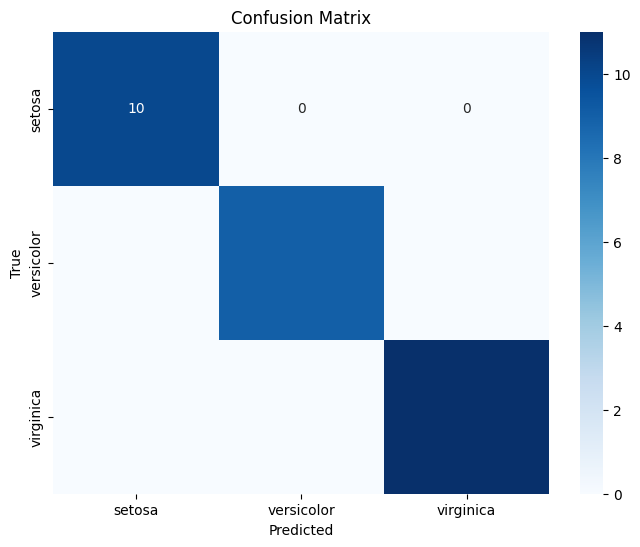

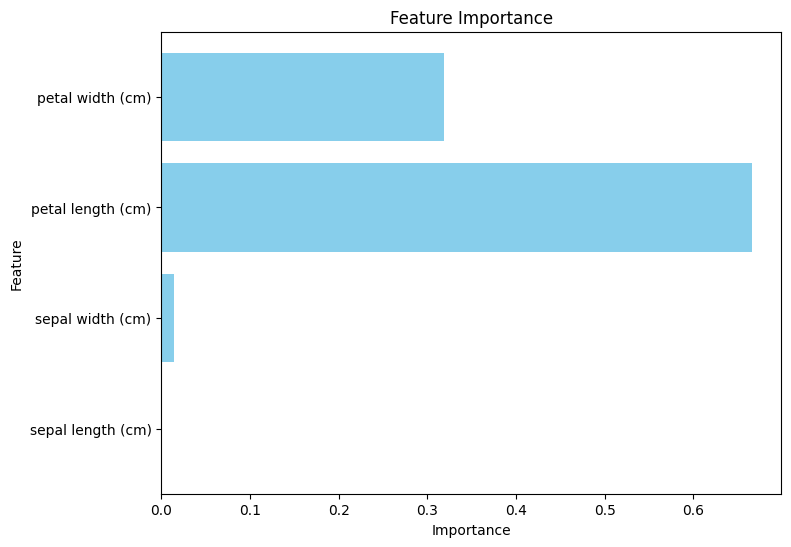

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# 예시 데이터셋: 붓꽃(Iris) 데이터셋
iris = load_iris()
X = iris.data  # 특성 (Features)
y = iris.target  # 레이블 (Labels)

# 훈련용 데이터와 테스트용 데이터로 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 그래디언트 부스팅 모델 생성
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# 모델 학습
gb_model.fit(X_train, y_train)

# 테스트 데이터로 예측
gb_y_pred = gb_model.predict(X_test)

# 정확도 평가
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print(f"그래디언트 부스팅 모델 정확도: {gb_accuracy * 100:.2f}%")

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, gb_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 특성 중요도 시각화
feature_importances = gb_model.feature_importances_
features = iris.feature_names

plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
# 출력:
# 모델 정확도: 그래디언트 부스팅 모델의 예측 정확도가 출력됩니다.
# 혼동 행렬: 예측값과 실제값을 비교한 혼동 행렬이 시각화됩니다.
# 특성 중요도: 각 특성이 예측에 얼마나 중요한지 나타내는 수평 바 차트가 출력됩니다.
# 결과:
# 이 코드를 실행하면 그래디언트 부스팅 모델의 성능을 시각적으로 평가할 수 있습니다.
# 예측 정확도와 함께 모델이 어떻게 작동하는지, 각 특성이 얼마나 중요한지에 대한 통찰을 얻을 수 있습니다.

In [ ]:
## 2.  1. 데이터 로드
df = pd.read_csv('creditcard.csv')


## 2. Credit Card Fraud Detection" 데이터셋 사례

In [ ]:
# 코드 설명
# 데이터 로드: creditcard.csv 파일을 불러옵니다. 이 데이터셋에는 약 28개의 익명화된 특징(V1, V2, ..., V28), Time, Amount, Class가 포함됩니다.
# 전처리:
# Class 컬럼이 타겟 변수(y), 나머지 컬럼이 특징 변수(X)입니다.
# Time과 Amount 컬럼은 스케일링을 적용하여 정규화합니다.
# 모델 학습:
# GradientBoostingClassifier 모델을 사용하여 학습합니다.
# n_estimators: 트리의 개수, learning_rate: 학습률, max_depth: 트리의 최대 깊이입니다.
# 모델 평가:
# 정확도, 혼동 행렬, 분류 보고서를 출력합니다.
# Precision, Recall, F1-score를 확인하여 성능을 평가할 수 있습니다.
# 특성 중요도 시각화:
# Gradient Boosting 모델의 각 특징이 예측에 얼마나 중요한지 시각화합니다.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 1. 데이터 로드 (Kaggle의 creditcard.csv 파일 경로를 지정하세요)
df = pd.read_csv('creditcard.csv')

# 2. 데이터 탐색
print(df.head())
print(df.info())
print(df['Class'].value_counts())

# 3. 데이터 전처리
# 타겟 변수와 특징 변수 분리
X = df.drop(columns=['Class'])
y = df['Class']

# 'Amount'와 'Time' 컬럼을 스케일링
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# 4. 데이터 분할 (Train/Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Gradient Boosting 모델 생성 및 학습
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# 6. 모델 평가
y_pred = gb_model.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 혼동 행렬 출력
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 분류 보고서 출력
print("Classification Report:\n", classification_report(y_test, y_pred))

# 7. 특성 중요도 시각화
feature_importances = gb_model.feature_importances_
features = X.columns

# 중요도 그래프
plt.figure(figsize=(12, 6))
plt.barh(features, feature_importances)
plt.title('Feature Importances in Gradient Boosting Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()



In [ ]:
df

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('creditcard.csv')

# 데이터 탐색
print(df.head())
print(df.info())
print(df['Class'].value_counts())

# 타겟 변수와 특징 변수 분리
X = df.drop(columns=['Class'])
y = df['Class']

# 스케일링
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Gradient Boosting 모델 학습
gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.05, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# 모델 평가
y_pred = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 특성 중요도 시각화
feature_importances = gb_model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
plt.barh(features, feature_importances)
plt.title('Feature Importances in Gradient Boosting Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
